In [6]:
import numpy as np
import scipy.stats as stats

data = np.array([49,58,75,110,112,132,151,276,281,362])

m0 = 200
stats.wilcoxon(data - m0, alternative='two-sided')

WilcoxonResult(statistic=17.0, pvalue=0.2845026979112075)

In [7]:
round(0.2845026979112075, 4)

0.2845

# 5

In [14]:
first = np.array([22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15])
second = np.array([17,18,18,15,12,4,14,15,10])

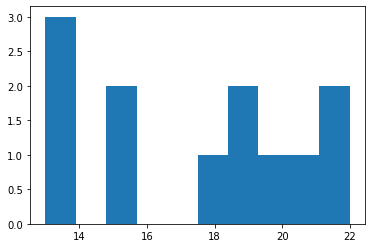

In [15]:
import matplotlib.pyplot as plt

plt.hist(first)
plt.show()


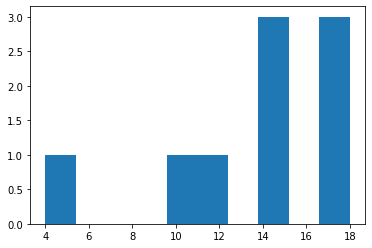

In [16]:
plt.hist(second)
plt.show()

In [17]:
stats.mannwhitneyu(first, second, alternative='greater')

MannwhitneyuResult(statistic=81.0, pvalue=0.02900499272087373)

In [18]:
round(0.02900499272087373, 4)

0.029

# 6

In [176]:
import pandas as pd 

data = pd.read_csv('challenger.txt', sep='\t')
data.shape

(23, 3)

In [177]:
data.head()

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0


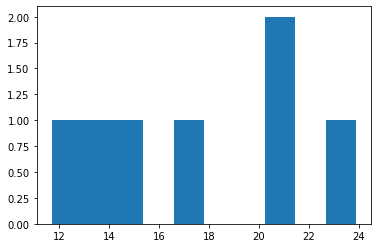

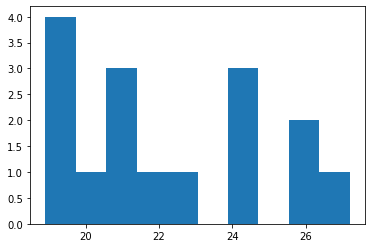

In [178]:
plt.hist(data[data.Incident == 1].Temperature)
plt.show()

plt.hist(data[data.Incident == 0].Temperature)
plt.show()

In [179]:
temp0 = data[data.Incident == 0].Temperature
temp1 = data[data.Incident == 1].Temperature

In [180]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    #print(indices)
    samples = data[indices]
    return samples

In [181]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [182]:
np.random.seed(0)

temp1_mean_scores = np.mean(get_bootstrap_samples(np.array(temp1), 1000), axis = 1)
temp0_mean_scores = np.mean(get_bootstrap_samples(np.array(temp0), 1000), axis = 1)

In [154]:
print("95% confidence interval for the ILEC median repair time:",  
      stat_intervals(temp0_mean_scores-temp1_mean_scores, 0.05))

95% confidence interval for the ILEC median repair time: [1.45040179 8.06457589]


In [156]:
round(1.45040179, 4)

1.4504

# 7

In [200]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [201]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [202]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [203]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [204]:
np.random.seed(0)
permutation_test(temp0, temp1, max_permutations = 10000, alternative = 'two-sided')

0.007